<a href="https://colab.research.google.com/github/joanarepinaldo/mit-deep-learning/blob/main/Lab1/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="http://introtodeeplearning.com">
        <img src="https://i.ibb.co/Jr88sn2/mit.png" style="padding-bottom:5px;" />
      Visit MIT Deep Learning</a></td>
 
  <td align="center"><a target="_blank"  href="https://www.linkedin.com/in/joana-pereira-repinaldo-3368b7116/">
        <img width="30%" src="https://raw.githubusercontent.com/joanarepinaldo/arquivos/main/logo1.png"  height="70px" style="padding-bottom:5px;"  /></a></td>
</table>


# Copyright Information




# Lab 1: a) Intro to TensorFlow 

**[TensorFlow](https://https://www.tensorflow.org/?hl=pt-br)** é uma biblioteca de código aberto para desenvolvimento de ML. Com este é possível desenvolver sistemas capazes de identificar padrões em grandes volumes de dados. Neste projeto será apresentado uma rede neural simples utilizando esta biblioteca.

## Configurando o ambiente de trabalho

Utilizamos no desenvolvimento as bibliotecas TensorFlow, Matplotlib e Numpy. Também foi instalada a biblioteca do curso do MIT -> mitdeeplearning.

In [ ]:
import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.1 MB 8.2 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=d9c589b8afaf3e980d1abbee69c4570b808dcc44108d939aa7c37f98dd0a7be3
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


## Fundamentos

Um Tensor consiste em arrays multidimensionais de tipo de dados básicos (como string ou um número inteiro)

A forma de um Tensor é baseada no número de elementos de cada um dos eixos ou seja seu comprimento, o rank (ou ordem do Tensor) é o número de eixos dos tensores.


In [ ]:
esporte = tf.constant("Futebol")
numero = tf.constant(1.365815)

print(esporte)
print(numero)

print("Esporte é um Tensor:{}-d".format(tf.rank(esporte).numpy()))
print("Numero é um Tensor: {}-d".format(tf.rank(numero).numpy()))

tf.Tensor(b'Futebol', shape=(), dtype=string)
tf.Tensor(1.365815, shape=(), dtype=float32)
Esporte é um Tensor:0-d
Numero é um Tensor: 0-d


1-d Tensors:

In [ ]:
esportes = tf.constant(["Futebol", "Tenis"])
numeros = tf.constant([3.1232, 1.122, 2.123])

print(esportes)
print(numeros)

print("esportes é um Tensor: {}-d com shape: {}".format(tf.rank(esportes).numpy(), tf.shape(esportes)))
print("numeros é um Tensor: {}-d com shape: {}".format(tf.rank(numeros).numpy(), tf.shape(numeros)))

tf.Tensor([b'Futebol' b'Tenis'], shape=(2,), dtype=string)
tf.Tensor([3.1232 1.122  2.123 ], shape=(3,), dtype=float32)
esportes é um Tensor: 1-d com shape: [2]
numeros é um Tensor: 1-d com shape: [3]


2-d e 4-d Tensors:

In [ ]:
matriz = tf.constant([[1,2],[3,4],[5,6]])

assert isinstance(matriz, tf.Tensor), "Matriz deve ser um Tensor" #Verifica se matrix é um tensor
assert tf.rank(matriz).numpy() == 2 #Verifica dimensão do tensor

print("Rank da matriz é {}".format(tf.rank(matriz).numpy()))

Rank da matriz é 2


In [ ]:
imagens = tf.zeros([10,2,2,3],tf.int32)

assert isinstance(imagens, tf.Tensor), "Matriz deve ser um Tensor" #Verifica se matrix é um tensor
assert tf.rank(imagens).numpy() == 4, "Deve ter rank 4" #Verifica rank
assert tf.shape(imagens).numpy().tolist() == [10,2,2,3] #Verifica shape

print("Rank das imagens é {}".format(tf.rank(imagens).numpy()))

Rank das imagens é 4


Propriedades dos tensores:

In [ ]:
print("Tipo:", matriz.dtype)
print("Numero de eixos:", matriz.ndim)
print("Vetor linha:", matriz[1])
print("Vetor Coluna:", matriz[:,1])
print("Escalar ", matriz[1, 1].numpy())


Tipo: <dtype: 'int32'>
Numero de eixos: 2
Vetor linha: tf.Tensor([3 4], shape=(2,), dtype=int32)
Vetor Coluna: tf.Tensor([2 4 6], shape=(3,), dtype=int32)
Escalar  4


## Grafos

São malhas com nós conectados entre si por arestas. Cada nó possui entradas e saídas como também a operação que deve ser feita com as entradas obter a saída desejada. As arestas consistem nos valores que são passados de um nó para outro. 

<center><img width="50%" src="https://raw.githubusercontent.com/joanarepinaldo/mit-deep-learning/main/assets/grafo1.png"</center>

In [ ]:
# Criando grafos
a = tf.constant(15)
b = tf.constant(61)

# Somando
c1 = tf.add(a,b)
c2 = a + b 
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [ ]:
# Função para operação de grafos
def func(a,b):
  
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c, d)
  return e
a, b = 1.5, 2.5
print(func(a,b))

tf.Tensor(6.0, shape=(), dtype=float32)


## Redes Neurais
É possível construir uma rede neural no TensorFlow utilizando [Keras](https://www.tensorflow.org/guide/keras), uma API de alto nível para criar e treinar modelos.

Considerando uma rede neural simples de uma cadama definida por: $ y = \sigma(Wx + b)$, onde $W$ representa uma matriz de pesos, $b$ é um viés, $x$ a entrada, $\sigma$ a função de ativação e $y$ é a saída:


<center><img width="50%" src="https://raw.githubusercontent.com/joanarepinaldo/mit-deep-learning/main/assets/A.png"></center>

Os tensores são organizados em camadas,arquitetura das redes neurais. As camadas implementam operações das redes neurais e são usadas para atualizar pesos, calcular perdas e definir a conectividade entre camadas. Definimos a camada para a rede acima:

In [ ]:
### Rede neural ###
# n_nos_saida: numero de saidas
# x: entrada

class CamandaDensa(tf.keras.layers.Layer):
  def __init__(self, n_nos_saida):
    super(CamandaDensa, self).__init__()
    self.n_nos_saida = n_nos_saida

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Parametros inicias de peso W e bias b
    self.W = self.add_weight("peso", shape=[d, self.n_nos_saida]) 
    self.b = self.add_weight("bias", shape=[1, self.n_nos_saida]) 

  def call(self, x):
    
    z = tf.matmul(x, self.W) + self.b # multiplica matrizes   

    y = tf.sigmoid(z) 
    return y

tf.random.set_seed(1)
layer = CamandaDensa(3)
layer.build((1,2))
x_entrada = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_entrada)

# Testando output com mdl 
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)


[[0.2697859  0.45750412 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [ ]:
### Rede neural usando Sequential API ###
# Importando Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Número de saidas
n_nos_saida = 3

# Modelo
modelo = Sequential()

# Camada densa é definida pelos parêmtros W e b!
camada_densa = Dense(n_nos_saida, 
                    activation='sigmoid') # activation é a função de ativação

# Adicionando camada no modelo
modelo.add(camada_densa)

# Testando
x_entrada = tf.constant([[1,2.]], shape=(1,2))

modelo_saida= modelo(x_entrada).numpy()
print(modelo_saida)


[[0.5607363 0.6566898 0.1249697]]


Usamos o modelo Sequential de Keras e uma única camada para definir a rede neural. Agora iremos utilizar a Subclassing :

In [ ]:
### Rede neural usando Subclassing ###

# Importando Keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
  
  def __init__(self, n_nos_saida):
    super(SubclassModel, self).__init__()
    
    self.camada_densa = tf.keras.layers.Dense(units=n_nos_saida,
                             activation='sigmoid',)

  def call(self, entradas):
    return self.camada_densa (entradas)

modelo = SubclassModel(n_nos_saida)
print(modelo.call(x_entrada))

tf.Tensor([[0.6504887  0.47828162 0.8373661 ]], shape=(1, 3), dtype=float32)


## Diferenciação automática

A diferenciação automática é útil para implementar algoritmos de aprendizado de máquina, como backpropagation , para treinar redes neurais.Esta permite que o sistema propague gradientes posteriormente.

Como exemplo temos a função: $ y = x^2$ , usaremos o GradienteTape para calcular os gradientes.

In [ ]:
### Gradiente com GradientTape ###

# y = x^2
x = tf.Variable(3.0)

# Inicializando
with tf.GradientTape() as tape:
    y = x * x # função
# Gradiente - derivada de y
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0 
print(dy_dx.numpy())

6.0


No treinamento de redes neurais, usamos o gradiente descendente estocástico (SGD), o qual consiste em encontrar, de forma iterativa, os valores dos parâmetros que minimizam determinada função de interesse.



Inicializando x=[[-0.35975078]]


Text(0, 0.5, 'x')

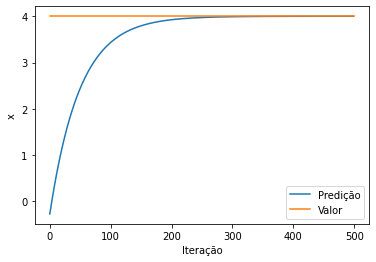

In [ ]:
###  SGD ###

# Inicializando x com um valor aleatório
x = tf.Variable([tf.random.normal([1])])
print("Inicializando x={}".format(x.numpy()))

taxa_aprendizado = 1e-2 # taxa de aprendizado
historico = []
# Valor desejado
x_f = 4

# Em cada iteração será computado a perda, a derivada da perda e a performace.
for i in range(500):
  with tf.GradientTape() as tape:
    
    perda = (x - x_f)**2 #função

  
  grad = tape.gradient(perda, x) # derivada
  novo_x = x - taxa_aprendizado*grad # atualiza
  x.assign(novo_x) 
  historico.append(x.numpy()[0])

# Plot
plt.plot(historico)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predição', 'Valor'))
plt.xlabel('Iteração')
plt.ylabel('x')